# EDA, Preprocessing, and Binary Classification (remove MBTI)

In [13]:
# Data Analysis
import re
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
sns.set_theme()

# Dimension reduction and embedding
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# Model training and evaluation
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Text Processing 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Other
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report

# NLTK resource
import nltk
nltk.download('punkt')  # for word_tokenize
nltk.download('wordnet')  # for WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/kanko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kanko/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kanko/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kanko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Training and Testing Split

In [2]:
# Load dataset form pickle
data_IE = pd.read_pickle('../data/Kaggle_MBTI_IE_tuneTI.pickle')
data_NS = pd.read_pickle('../data/Kaggle_MBTI_NS_tuneTI.pickle')
data_TF = pd.read_pickle('../data/Kaggle_MBTI_TF_tuneTI.pickle')
data_JP = pd.read_pickle('../data/Kaggle_MBTI_JP_tuneTI.pickle')

X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = data_IE['X_train'], data_IE['X_test'], data_IE['Y_train'], data_IE['Y_test']
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = data_NS['X_train'], data_NS['X_test'], data_NS['Y_train'], data_NS['Y_test']
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = data_TF['X_train'], data_TF['X_test'], data_TF['Y_train'], data_TF['Y_test']
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = data_JP['X_train'], data_JP['X_test'], data_JP['Y_train'], data_JP['Y_test']

In [3]:
print(f'IE dataset:\nTrain|| X:{X_train_IE.shape}\tY:{Y_train_IE.shape} \nTest || X:{X_test_IE.shape}\tY:{Y_test_IE.shape}\n')
print(f'NS dataset:\nTrain|| X:{X_train_NS.shape}\tY:{Y_train_NS.shape} \nTest || X:{X_test_NS.shape}\tY:{Y_test_NS.shape}\n')
print(f'TF dataset:\nTrain|| X:{X_train_TF.shape}\tY:{Y_train_TF.shape} \nTest || X:{X_test_TF.shape}\tY:{Y_test_TF.shape}\n')
print(f'JP dataset:\nTrain|| X:{X_train_JP.shape}\tY:{Y_train_JP.shape} \nTest || X:{X_test_JP.shape}\tY:{Y_test_JP.shape}\n')

IE dataset:
Train|| X:(6940, 100)	Y:(6940,) 
Test || X:(1735, 100)	Y:(1735,)

NS dataset:
Train|| X:(6940, 100)	Y:(6940,) 
Test || X:(1735, 100)	Y:(1735,)

TF dataset:
Train|| X:(6940, 100)	Y:(6940,) 
Test || X:(1735, 100)	Y:(1735,)

JP dataset:
Train|| X:(6940, 100)	Y:(6940,) 
Test || X:(1735, 100)	Y:(1735,)



### Oversampling with SMOTE

In [3]:
# Load SMOTE form pickle
data_IE_smote = pd.read_pickle('../data/Kaggle_MBTI_IE_smote_tuneTI.pickle')
data_NS_smote = pd.read_pickle('../data/Kaggle_MBTI_NS_smote_tuneTI.pickle')
data_TF_smote = pd.read_pickle('../data/Kaggle_MBTI_TF_smote_tuneTI.pickle')
data_JP_smote = pd.read_pickle('../data/Kaggle_MBTI_JP_smote_tuneTI.pickle')

X_smote_IE, Y_smote_IE = data_IE_smote['X_train'], data_IE_smote['Y_train']
X_smote_NS, Y_smote_NS = data_NS_smote['X_train'], data_NS_smote['Y_train']
X_smote_TF, Y_smote_TF = data_TF_smote['X_train'], data_TF_smote['Y_train']
X_smote_JP, Y_smote_JP = data_JP_smote['X_train'], data_JP_smote['Y_train']

#### Model method

In [14]:
def predict(model1, model2, model3, model4):
    '''
    Function to predict labels for X_test of the given model
    Input: 4 models
    Output: predicted values
    '''
    ypredIE = model1.fit(X_train_IE,Y_train_IE).best_estimator_.predict(X_test_IE)
    ypredNS = model2.fit(X_train_NS,Y_train_NS).best_estimator_.predict(X_test_NS)
    ypredTF = model3.fit(X_train_TF,Y_train_TF).best_estimator_.predict(X_test_TF)
    ypredJP = model4.fit(X_train_JP,Y_train_JP).best_estimator_.predict(X_test_JP)

    return ypredIE, ypredNS, ypredTF, ypredJP


def predict_SMOTE(model1, model2, model3, model4):
    '''
    Function to predict labels for X_test of the given model
    Input: 4 models
    Output: predicted values
    '''
    ypredIE = model1.fit(X_smote_IE,Y_smote_IE).best_estimator_.predict(X_test_IE)
    ypredNS = model2.fit(X_smote_NS,Y_smote_NS).best_estimator_.predict(X_test_NS)
    ypredTF = model3.fit(X_smote_TF,Y_smote_TF).best_estimator_.predict(X_test_TF)
    ypredJP = model4.fit(X_smote_JP,Y_smote_JP).best_estimator_.predict(X_test_JP)

    return ypredIE, ypredNS, ypredTF, ypredJP

#### Evaluation method

In [15]:
def print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP):
   '''
   Function to print Classification Report of the given model
   This function takes 4 predicted output datasets as input.
   It computes classfication report: accuracy, recall, f1-score.
   It prints classification reports for all 4 predictions (models).
   '''
   print(f'Classification Report for Introversion(I) / Extroversion(E):\n {classification_report(Y_test_IE, ypredIE)}\n')
   
   print(f'Classification Report for Intuition(N) / Sensing(S):\n {classification_report(Y_test_NS, ypredNS)}\n')
   
   print(f'Classification Report for Thinking(T) / Feeling(F):\n{classification_report(Y_test_TF, ypredTF)}\n')

   print(f'Classification Report for Judging(J) / Perceiving(P):\n {classification_report(Y_test_JP, ypredJP)}\n')


def print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP):
   cm = confusion_matrix(Y_test_IE, ypredIE)
   plt.figure(figsize=(5,4))
   sns.heatmap(cm, annot=True,cmap='Reds_r',fmt='g')
   plt.ylabel('Y_test_IE')
   plt.xlabel('ypredIE')
   plt.title('Confusion matrix for Introversion(I) / Extroversion(E): ', size=12)

   cm = confusion_matrix(Y_test_NS, ypredNS)
   plt.figure(figsize=(5,4))
   sns.heatmap(cm, annot=True,cmap='Greens_r',fmt='g')
   plt.ylabel('Y_test_NS')
   plt.xlabel('ypredNS')
   plt.title('Confusion matrix for Intuition(N) / Sensing(S): ', size=12)

   cm = confusion_matrix(Y_test_TF, ypredTF)
   plt.figure(figsize=(5,4))
   sns.heatmap(cm, annot=True,cmap='Blues_r',fmt='g')
   plt.ylabel('Y_test_TF')
   plt.xlabel('ypredTF')
   plt.title('Confusion matrix for Thinking(T) / Feeling(F): ', size=12)

   cm = confusion_matrix(Y_test_JP, ypredJP)
   plt.figure(figsize=(5,4))
   sns.heatmap(cm, annot=True,cmap='Purples_r',fmt='g')
   plt.ylabel('Y_test_JP')
   plt.xlabel('ypredJP')
   plt.title('Confusion matrix for Judging(J) / Perceiving(P): ', size=12)


def print_roc_auc_curve(probIE, probNS, probTF, probJP, title:str):
   fp_IE, tp_IE, _ = roc_curve(Y_test_IE, probIE[:,1])
   fp_NS, tp_NS, _ = roc_curve(Y_test_NS, probNS[:,1])
   fp_TF, tp_TF, _ = roc_curve(Y_test_TF, probTF[:,1])
   fp_JP, tp_JP, _ = roc_curve(Y_test_JP, probJP[:,1])
   plt.figure(figsize=(8,5))
   plt.plot(fp_IE, tp_IE, linestyle=':', color='indianred', label=f'Introversion(I) / Extroversion(E) (area={auc(fp_IE, tp_IE):.2f})',linewidth=1.8)
   plt.plot(fp_NS, tp_NS, linestyle='--', color='darkseagreen', label=f'Intuition(N) / Sensing(S) (area={auc(fp_NS, tp_NS):.2f})',linewidth=1.8)
   plt.plot(fp_TF, tp_TF, linestyle='-.', color='dodgerblue', label=f'Thinking(T) / Feeling(F) (area={auc(fp_TF, tp_TF):.2f})',linewidth=1.8)
   plt.plot(fp_JP, tp_JP, linestyle='--', color='orchid', label=f'Judging(J) / Perceiving(P) (area={auc(fp_TF, tp_TF):.2f})',linewidth=1.8)
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(title+' ROC Curve')
   plt.legend(loc='best')
   plt.savefig('../img/ROC_'+title+'_tune.png')

### Imbalance data

#### Naive Bayes Model

In [62]:
gNB = GaussianNB()
# Cross validation
grid1 = RandomizedSearchCV(gNB,{},cv=5,random_state=42,scoring='f1')
grid2 = RandomizedSearchCV(gNB,{},cv=5,random_state=42,scoring='f1')
grid3 = RandomizedSearchCV(gNB,{},cv=5,random_state=42,scoring='f1')
grid4 = RandomizedSearchCV(gNB,{},cv=5,random_state=42,scoring='f1')
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.41      0.26      0.32       400
           1       0.80      0.89      0.84      1335

    accuracy                           0.75      1735
   macro avg       0.61      0.57      0.58      1735
weighted avg       0.71      0.75      0.72      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.22      0.16      0.19       239
           1       0.87      0.91      0.89      1496

    accuracy                           0.81      1735
   macro avg       0.55      0.54      0.54      1735
weighted avg       0.78      0.81      0.79      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       939
           1       0.62      0.77      0.69       796

    accuracy

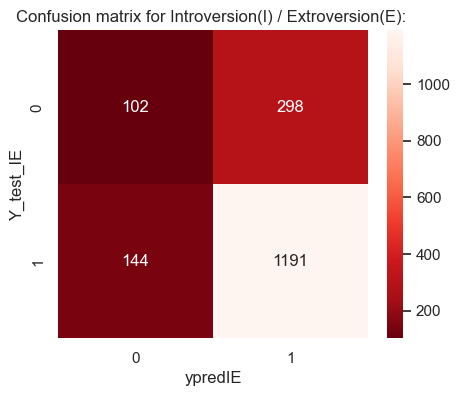

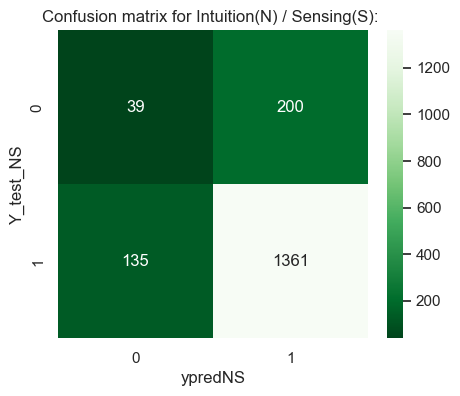

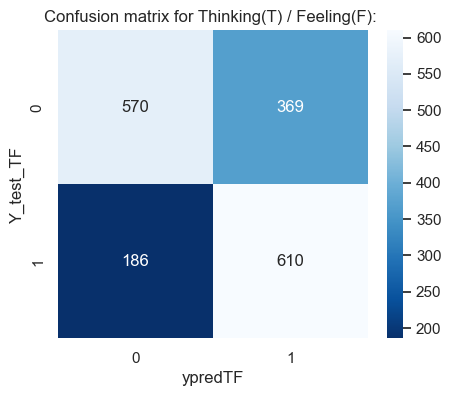

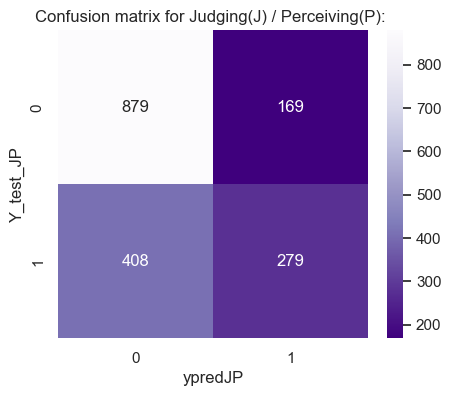

In [63]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

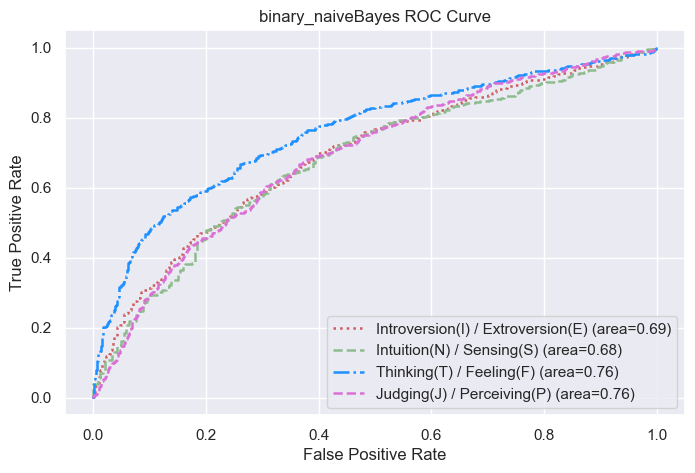

In [64]:
# ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP),
                    title='binary_naiveBayes')

#### Logistic Regression

In [65]:
log = LogisticRegression(max_iter=500, random_state=42)
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
# Cross validation
grid1 = RandomizedSearchCV(log,param_grid,cv=5,random_state=42,scoring='f1')
grid2 = RandomizedSearchCV(log,param_grid,cv=5,random_state=42,scoring='f1')
grid3 = RandomizedSearchCV(log,param_grid,cv=5,random_state=42,scoring='f1')
grid4 = RandomizedSearchCV(log,param_grid,cv=5,random_state=42,scoring='f1')
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.61      0.20      0.30       400
           1       0.80      0.96      0.87      1335

    accuracy                           0.79      1735
   macro avg       0.71      0.58      0.59      1735
weighted avg       0.76      0.79      0.74      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.56      0.12      0.20       239
           1       0.88      0.98      0.93      1496

    accuracy                           0.87      1735
   macro avg       0.72      0.55      0.56      1735
weighted avg       0.83      0.87      0.83      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       939
           1       0.77      0.78      0.78       796

    accuracy

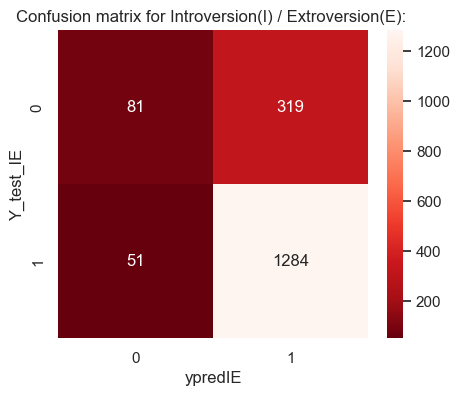

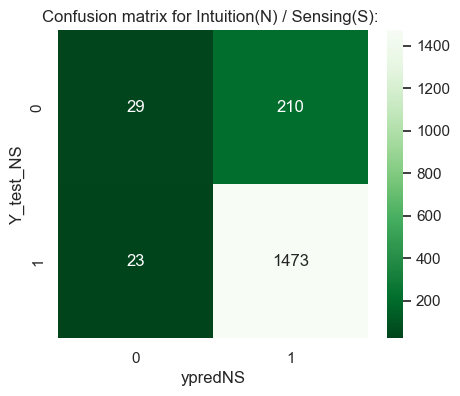

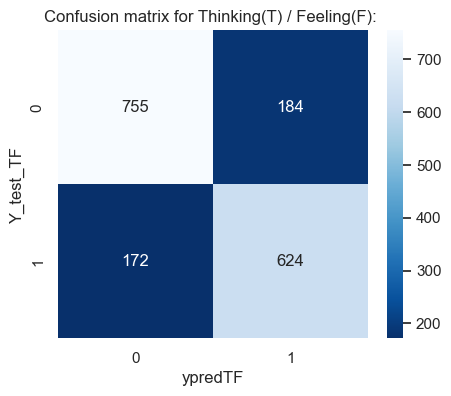

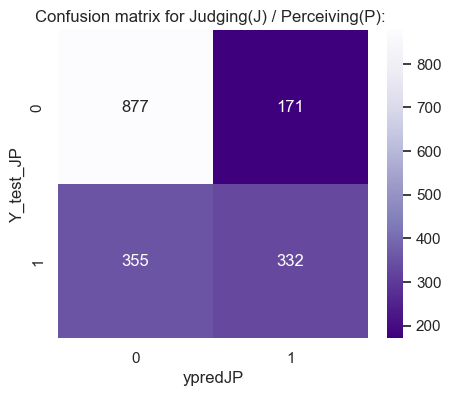

In [66]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

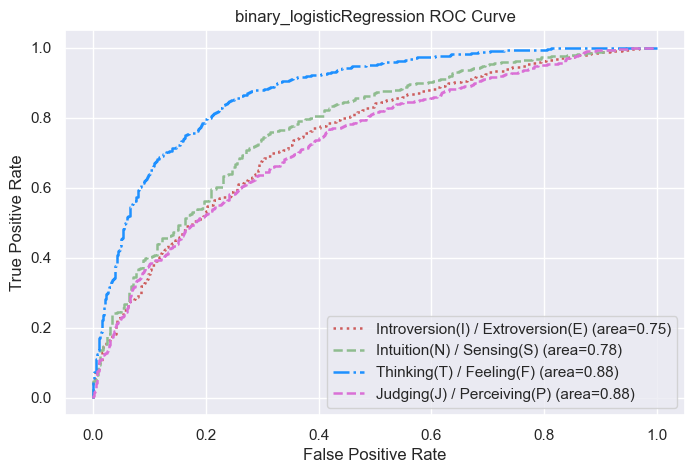

In [67]:
# ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP),
                    title='binary_logisticRegression')

#### SVM

In [68]:
svm = SVC(random_state=42, probability=True, max_iter=100)
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001]}
# Cross validation
grid1 = RandomizedSearchCV(svm,param_grid,cv=5,random_state=42,scoring='f1')
grid2 = RandomizedSearchCV(svm,param_grid,cv=5,random_state=42,scoring='f1')
grid3 = RandomizedSearchCV(svm,param_grid,cv=5,random_state=42,scoring='f1')
grid4 = RandomizedSearchCV(svm,param_grid,cv=5,random_state=42,scoring='f1')
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.35      0.27      0.30       400
           1       0.79      0.85      0.82      1335

    accuracy                           0.72      1735
   macro avg       0.57      0.56      0.56      1735
weighted avg       0.69      0.72      0.70      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.29      0.15      0.20       239
           1       0.87      0.94      0.91      1496

    accuracy                           0.83      1735
   macro avg       0.58      0.55      0.55      1735
weighted avg       0.79      0.83      0.81      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.79      0.20      0.32       939
           1       0.50      0.94      0.65       796

    accuracy

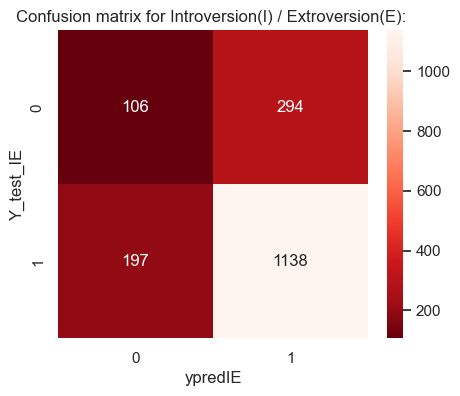

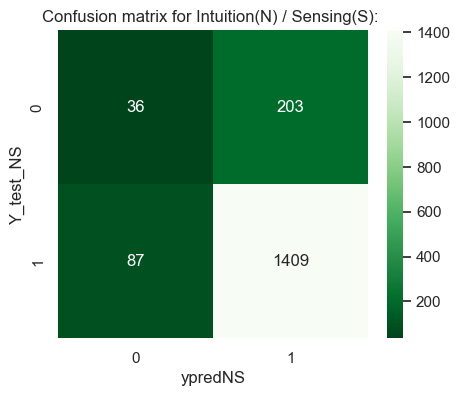

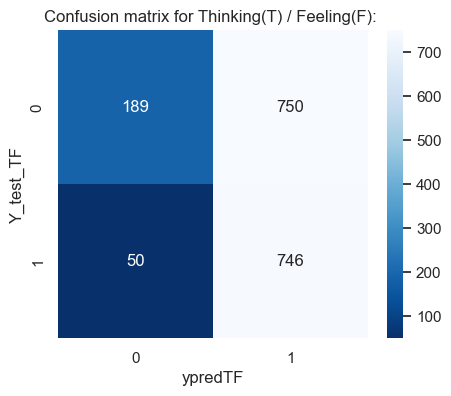

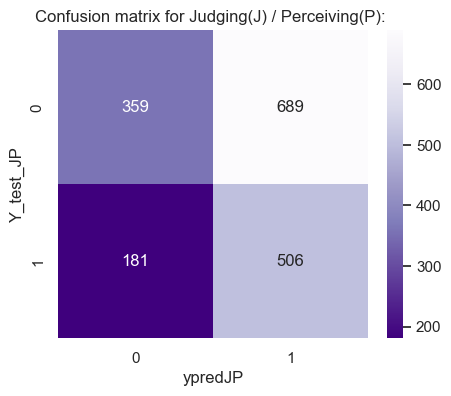

In [69]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

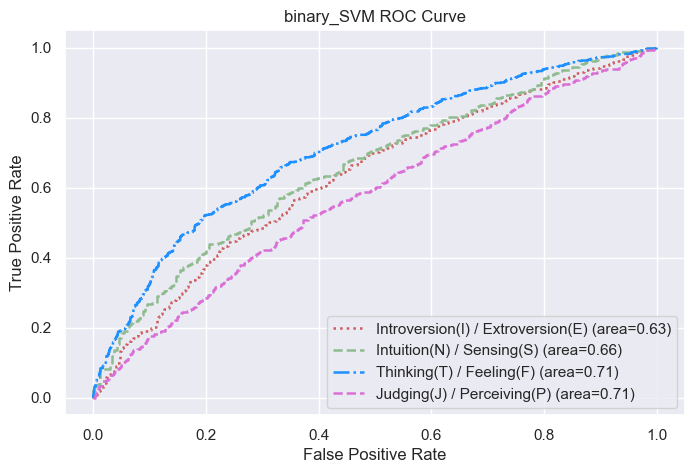

In [70]:
# ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP),
                    title='binary_SVM')

#### K-Nearest Neighbor (KNN)

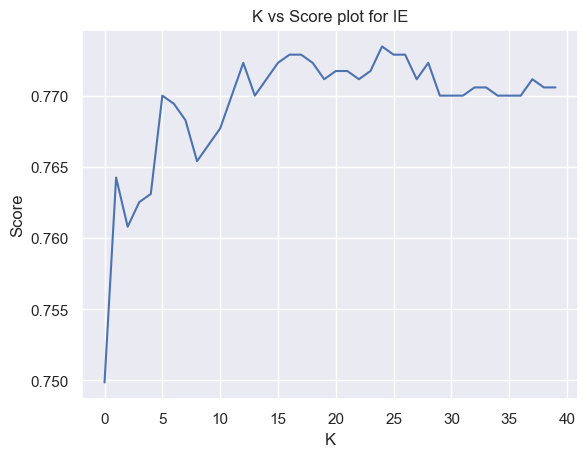

Maximum Accuracy of 0.7734870317002882 at k=25


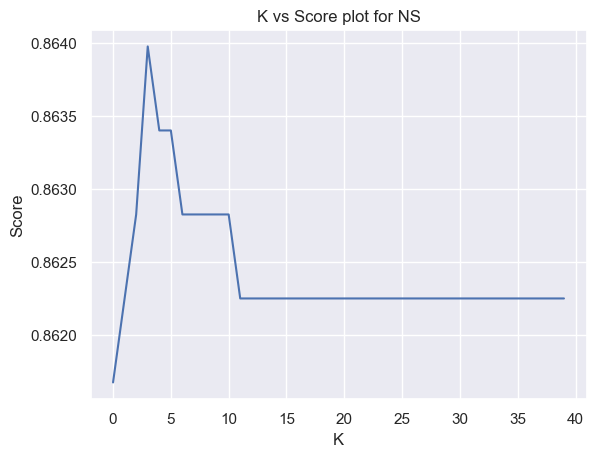

Maximum Accuracy of 0.8639769452449567 at k=4


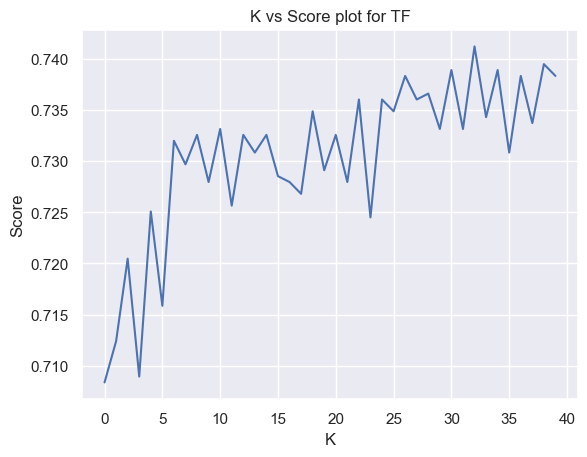

Maximum Accuracy of 0.7412103746397695 at k=33


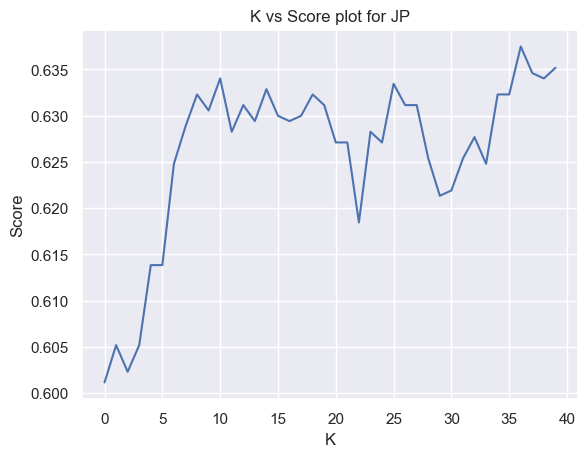

Maximum Accuracy of 0.7412103746397695 at k=33


In [71]:
def plot_graph(val,xlab,ylab,title):
    plt.figure()
    plt.plot(val)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.title(title)
    plt.show()

# IE prediction
k1_score = []
for i in range(10,50):
    k1 = KNeighborsClassifier(n_neighbors=i)
    k1.fit(X_train_IE, Y_train_IE)
    k1_score.append(k1.score(X_test_IE, Y_test_IE))

df1 = pd.DataFrame(k1_score,columns=['IE'])
plot_graph(k1_score,'K','Score','K vs Score plot for IE')
print(f'Maximum Accuracy of {df1.max()[0]} at k={df1.idxmax()[0]+1}')

# NS prediction
k2_score = []
for i in range(10,50):
	k2 = KNeighborsClassifier(n_neighbors=i)
	k2.fit(X_train_NS, Y_train_NS)
	k2_score.append(k2.score(X_test_NS, Y_test_NS))

df2 = pd.DataFrame(k2_score,columns=['NS'])
plot_graph(k2_score,'K','Score','K vs Score plot for NS')
print(f'Maximum Accuracy of {df2.max()[0]} at k={df2.idxmax()[0]+1}')

# TF prediction
k3_score = []
for i in range(10,50):
  k3 = KNeighborsClassifier(n_neighbors=i)
  k3.fit(X_train_TF, Y_train_TF)
  k3_score.append(k3.score(X_test_TF, Y_test_TF))

df3 = pd.DataFrame(k3_score,columns=['TF'])
plot_graph(k3_score,'K','Score','K vs Score plot for TF')
print(f'Maximum Accuracy of {df3.max()[0]} at k={df3.idxmax()[0]+1}')

# JP prediction
k4_score=[]
for i in range(10,50):
  k4 = KNeighborsClassifier(n_neighbors=i)
  k4.fit(X_train_JP, Y_train_JP)
  k4_score.append(k4.score(X_test_JP, Y_test_JP))

df4 = pd.DataFrame(k3_score,columns=['JP'])
plot_graph(k4_score,'K','Score','K vs Score plot for JP')
print(f'Maximum Accuracy of {df4.max()[0]} at k={df4.idxmax()[0]+1}')

In [72]:
kbest = KNeighborsClassifier(n_neighbors=df1.idxmax()[0]+1)
ypredIE = kbest.fit(X_train_IE,Y_train_IE).predict(X_test_IE)
probIE = kbest.predict_proba(X_test_IE)

kbest = KNeighborsClassifier(n_neighbors=df2.idxmax()[0]+1)
ypredNS = kbest.fit(X_train_NS,Y_train_NS).predict(X_test_NS)
probNS = kbest.predict_proba(X_test_NS)

kbest = KNeighborsClassifier(n_neighbors=df3.idxmax()[0]+1)
ypredTF = kbest.fit(X_train_TF,Y_train_TF).predict(X_test_TF)
probTF = kbest.predict_proba(X_test_TF)

kbest = KNeighborsClassifier(n_neighbors=df4.idxmax()[0]+1)
ypredJP = kbest.fit(X_train_JP,Y_train_JP).predict(X_test_JP)
probJP = kbest.predict_proba(X_test_JP)

# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.63      0.03      0.06       400
           1       0.77      0.99      0.87      1335

    accuracy                           0.77      1735
   macro avg       0.70      0.51      0.46      1735
weighted avg       0.74      0.77      0.68      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.29      0.17      0.22       239
           1       0.88      0.93      0.90      1496

    accuracy                           0.83      1735
   macro avg       0.59      0.55      0.56      1735
weighted avg       0.80      0.83      0.81      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       939
           1       0.67      0.78      0.72       796

    accuracy

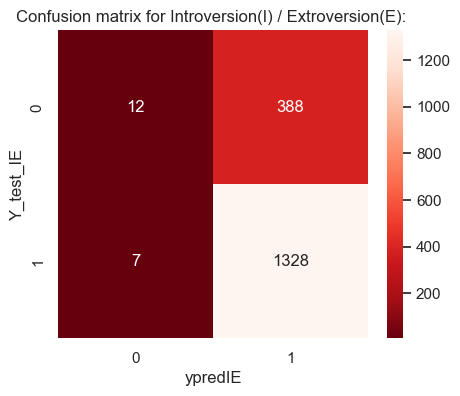

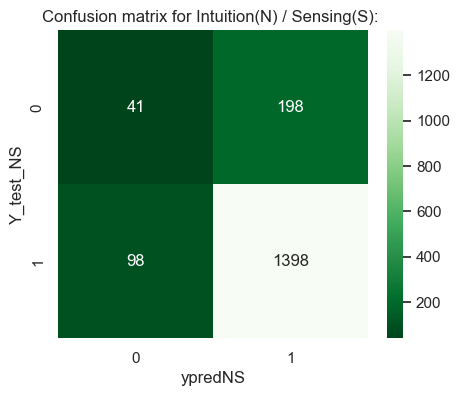

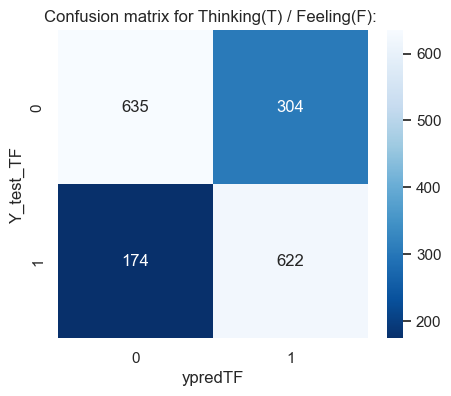

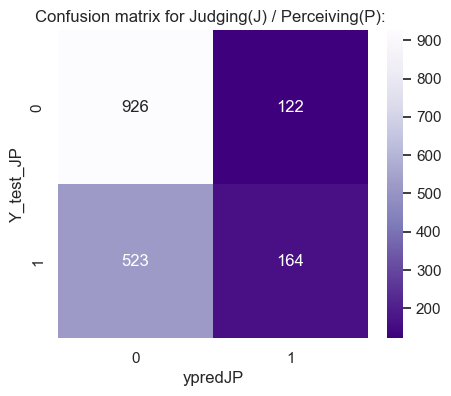

In [73]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

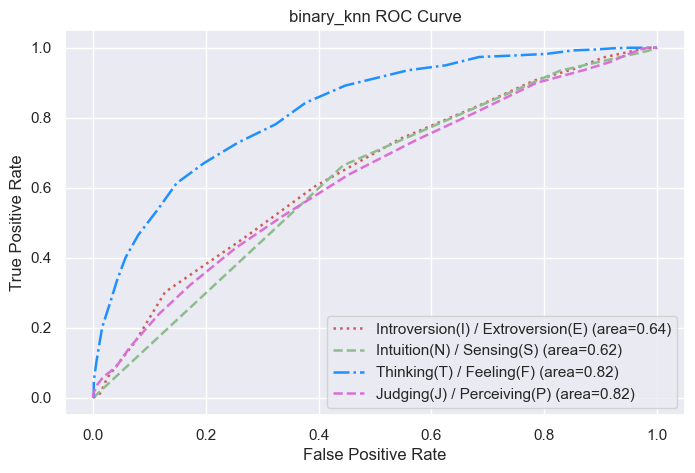

In [74]:
# ROC curve
print_roc_auc_curve(probIE, probNS, probTF, probJP, title='binary_knn')

#### Decision Tree

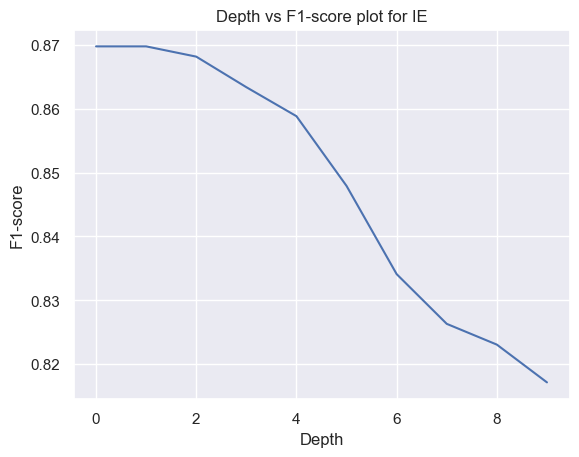

Maximum F1-score of 0.8697988463460776 at depth=1


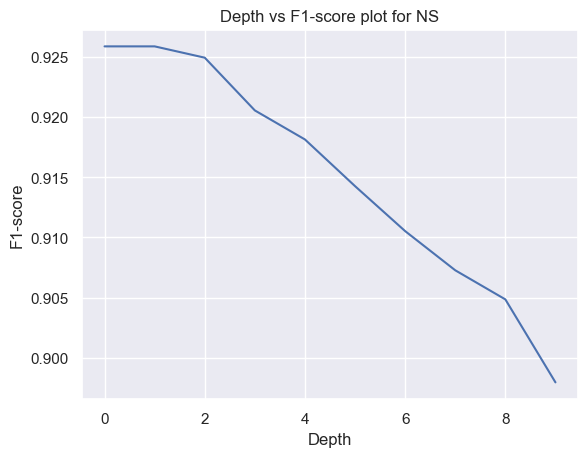

Maximum F1-score of 0.9258628309310083 at depth=1


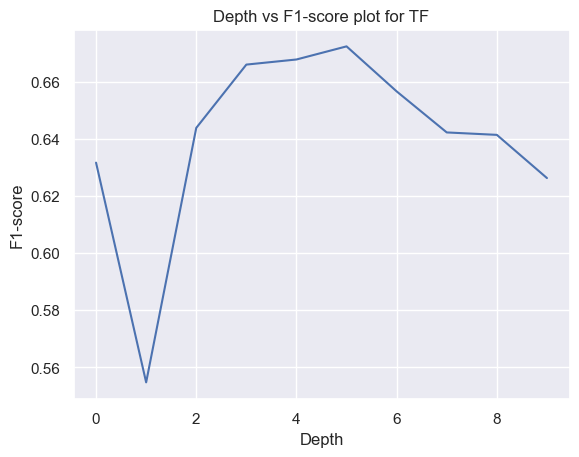

Maximum F1-score of 0.672414193654779 at depth=6


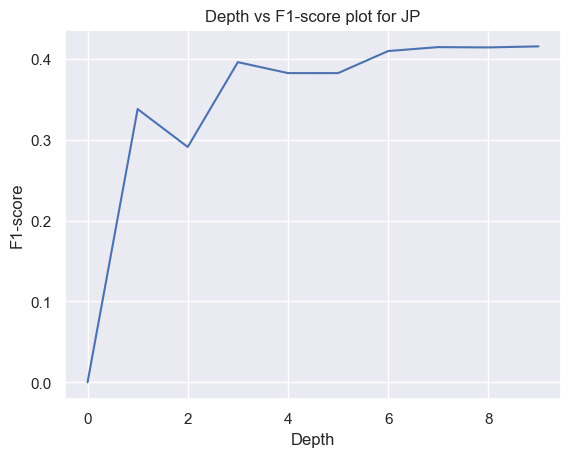

Maximum F1-score of 0.4152263660469032 at depth=10


In [75]:
def plot_graph(val, title):
    plt.plot(val)
    plt.ylabel('F1-score')
    plt.xlabel('Depth')
    plt.title(title)
    plt.show()

# IE prediction
k1_score = []
for i in range(1,11):
    k1_cart = DecisionTreeClassifier(criterion="gini", max_depth=i)
    score = cross_val_score(k1_cart, X_train_IE, Y_train_IE, cv=5, scoring='f1')
    k1_score.append(score.mean())
df1 = pd.DataFrame(k1_score,columns=['IE'])
plot_graph(k1_score,'Depth vs F1-score plot for IE')
print(f'Maximum F1-score of {df1.max()[0]} at depth={df1.idxmax()[0]+1}')

# NS prediction
k2_score = []
for i in range(1,11):
    k2_cart = DecisionTreeClassifier(criterion="gini", max_depth=i)
    score = cross_val_score(k2_cart, X_train_NS, Y_train_NS, cv=5, scoring='f1')
    k2_score.append(score.mean())
df2 = pd.DataFrame(k2_score,columns=['NS'])
plot_graph(k2_score,'Depth vs F1-score plot for NS')
print(f'Maximum F1-score of {df2.max()[0]} at depth={df2.idxmax()[0]+1}')

# TF prediction
k3_score = []
for i in range(1,11):
    k3_cart = DecisionTreeClassifier(criterion="gini", max_depth=i)
    score = cross_val_score(k3_cart, X_train_TF, Y_train_TF, cv=5, scoring='f1')
    k3_score.append(score.mean())
df3 = pd.DataFrame(k3_score,columns=['TF'])
plot_graph(k3_score,'Depth vs F1-score plot for TF')
print(f'Maximum F1-score of {df3.max()[0]} at depth={df3.idxmax()[0]+1}')

# JP prediction
k4_score=[]
for i in range(1,11):
    k4_cart = DecisionTreeClassifier(criterion="gini", max_depth=i)
    score = cross_val_score(k4_cart, X_train_JP, Y_train_JP, cv=5, scoring='f1')
    k4_score.append(score.mean())
df4 = pd.DataFrame(k4_score,columns=['JP'])
plot_graph(k4_score,'Depth vs F1-score plot for JP')
print(f'Maximum F1-score of {df4.max()[0]} at depth={df4.idxmax()[0]+1}')

In [76]:
dtbest = DecisionTreeClassifier(random_state=42,criterion="gini",max_depth=df1.idxmax()[0]+1)
ypredIE = dtbest.fit(X_train_IE,Y_train_IE).predict(X_test_IE)
probIE = dtbest.predict_proba(X_test_IE)

dtbest = DecisionTreeClassifier(random_state=42,criterion="gini",max_depth=df2.idxmax()[0]+1)
ypredNS = dtbest.fit(X_train_NS,Y_train_NS).predict(X_test_NS)
probNS = dtbest.predict_proba(X_test_NS)

dtbest = DecisionTreeClassifier(random_state=42,criterion="gini",max_depth=df3.idxmax()[0]+1)
ypredTF = dtbest.fit(X_train_TF,Y_train_TF).predict(X_test_TF)
probTF = dtbest.predict_proba(X_test_TF)

dtbest = DecisionTreeClassifier(random_state=42,criterion="gini",max_depth=df4.idxmax()[0]+1)
ypredJP = dtbest.fit(X_train_JP,Y_train_JP).predict(X_test_JP)
probJP = dtbest.predict_proba(X_test_JP)

# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.77      1.00      0.87      1335

    accuracy                           0.77      1735
   macro avg       0.38      0.50      0.43      1735
weighted avg       0.59      0.77      0.67      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.86      1.00      0.93      1496

    accuracy                           0.86      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.74      0.86      0.80      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       939
           1       0.65      0.69      0.67       796

    accuracy

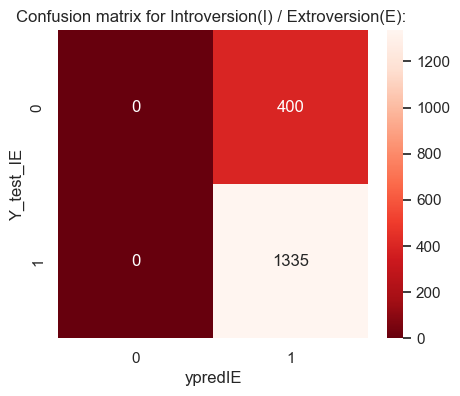

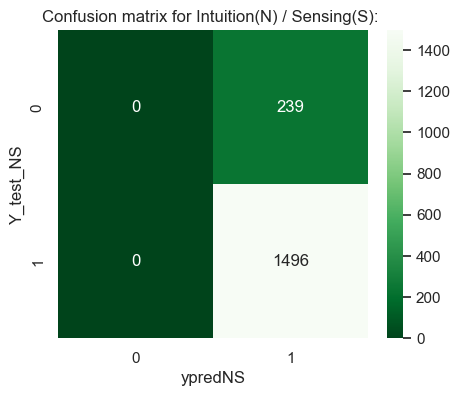

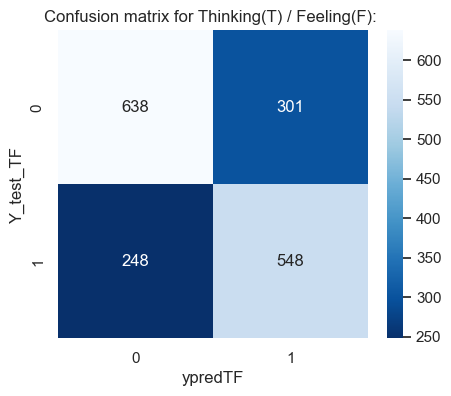

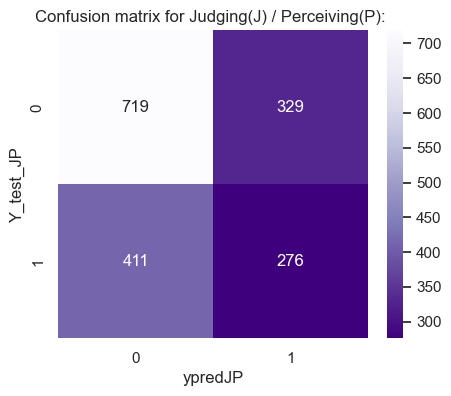

In [77]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

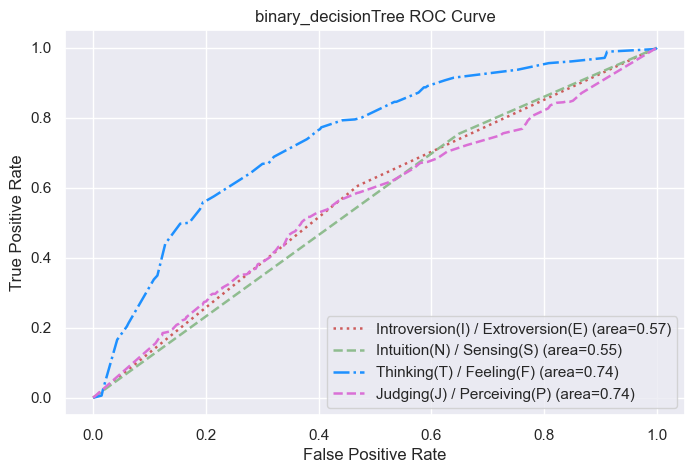

In [78]:
# ROC curve
print_roc_auc_curve(probIE, probNS, probTF, probJP, title='binary_decisionTree')

#### Random Forest

In [100]:
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100,200,300]}
# Cross validation
grid1 = RandomizedSearchCV(rf,param_grid,cv=5,random_state=42,scoring='f1',verbose=1)
grid2 = RandomizedSearchCV(rf,param_grid,cv=5,random_state=42,scoring='f1',verbose=1)
grid3 = RandomizedSearchCV(rf,param_grid,cv=5,random_state=42,scoring='f1',verbose=1)
grid4 = RandomizedSearchCV(rf,param_grid,cv=5,random_state=42,scoring='f1',verbose=1)
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.50      0.01      0.02       400
           1       0.77      1.00      0.87      1335

    accuracy                           0.77      1735
   macro avg       0.64      0.50      0.44      1735
weighted avg       0.71      0.77      0.67      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.33      0.00      0.01       239
           1       0.86      1.00      0.93      1496

    accuracy                           0.86      1735
   macro avg       0.60      0.50      0.47      1735
weighted avg       0.79      0.86      0.80 

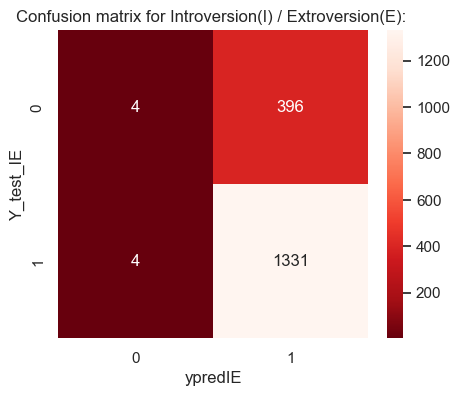

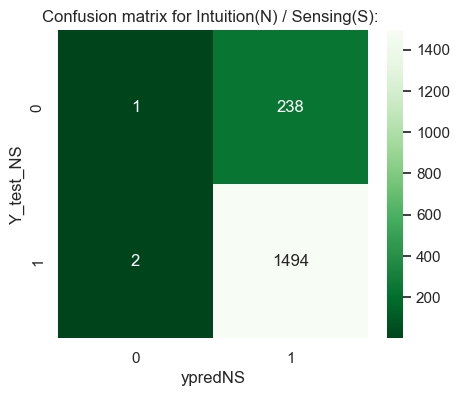

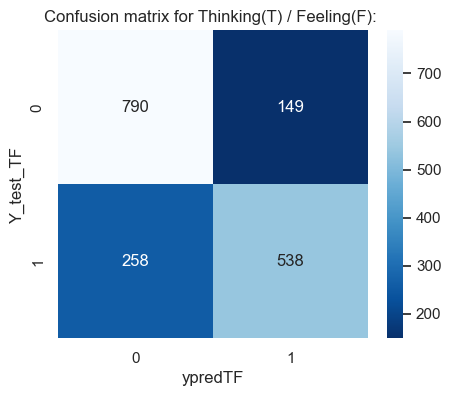

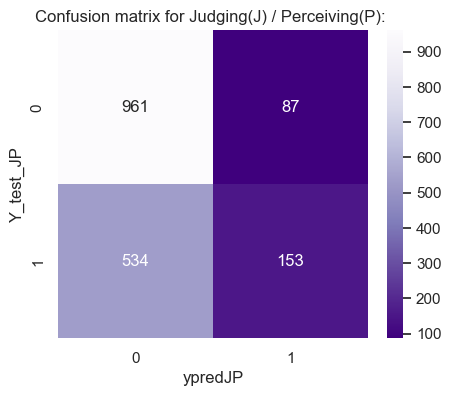

In [102]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

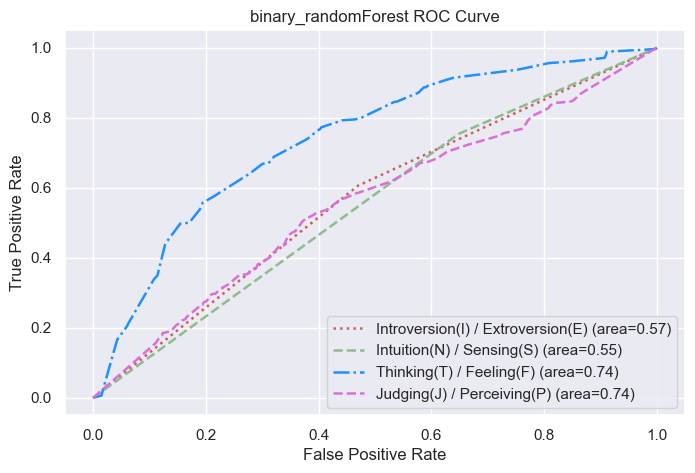

In [103]:
# ROC curve
print_roc_auc_curve(probIE, probNS, probTF, probJP, title='binary_randomForest')

#### Gradient Boost

In [106]:
boost = GradientBoostingClassifier(random_state=42,n_iter_no_change=3)
param_grid = {'learning_rate': [0.01, 0.1, 0.5]}
# Cross validation
grid1 = RandomizedSearchCV(boost,param_grid,cv=5,random_state=42,scoring='f1')
grid2 = RandomizedSearchCV(boost,param_grid,cv=5,random_state=42,scoring='f1')
grid3 = RandomizedSearchCV(boost,param_grid,cv=5,random_state=42,scoring='f1')
grid4 = RandomizedSearchCV(boost,param_grid,cv=5,random_state=42,scoring='f1')
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.77      1.00      0.87      1335

    accuracy                           0.77      1735
   macro avg       0.38      0.50      0.43      1735
weighted avg       0.59      0.77      0.67      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.86      1.00      0.93      1496

    accuracy                           0.86      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.74      0.86      0.80      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       939
           1       0.75      0.73      0.74       796

    accuracy

In [107]:
pd.DataFrame(grid1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.504321,1.415589,0.005864,0.002186,0.01,{'learning_rate': 0.01},0.870167,0.869707,0.869707,0.869707,0.869707,0.869799,0.000184,1
1,5.948064,2.276935,0.002957,0.001100,0.1,{'learning_rate': 0.1},0.865598,0.870386,0.868670,0.869423,0.870416,0.868898,0.001774,2
2,1.651667,0.712120,0.001794,0.000440,0.5,{'learning_rate': 0.5},0.860642,0.866057,0.854737,0.861680,0.865089,0.861641,0.004001,3


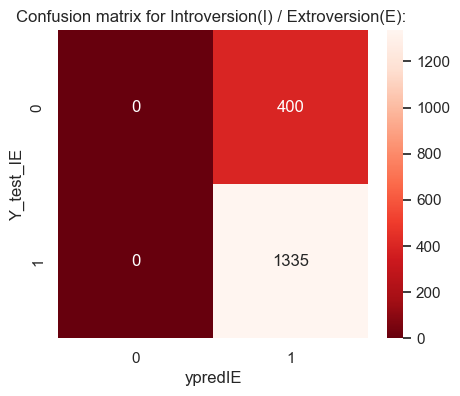

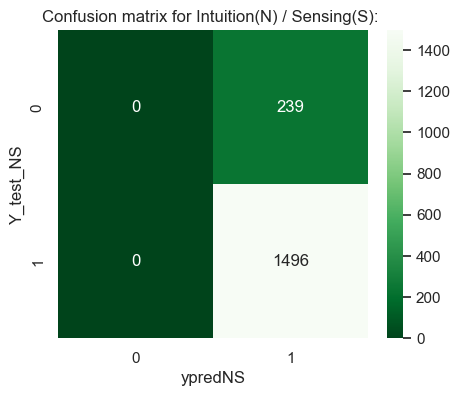

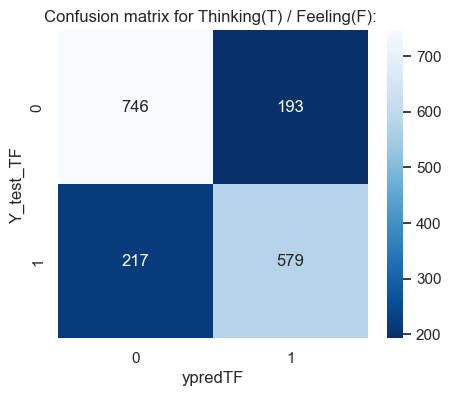

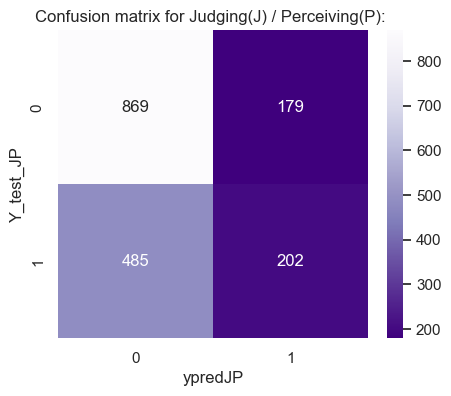

In [108]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

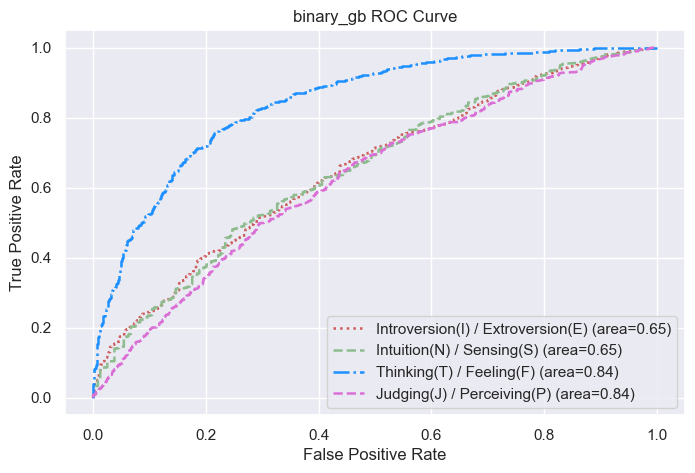

In [109]:
# ROC Curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF), grid4.best_estimator_.predict_proba(X_test_JP),
                    title='binary_gb')

### Oversampled data

#### Naive Bayes Model

In [110]:
gNB = GaussianNB()
# Cross validation
grid1 = RandomizedSearchCV(gNB,{},cv=5,random_state=42,scoring='f1')
grid2 = RandomizedSearchCV(gNB,{},cv=5,random_state=42,scoring='f1')
grid3 = RandomizedSearchCV(gNB,{},cv=5,random_state=42,scoring='f1')
grid4 = RandomizedSearchCV(gNB,{},cv=5,random_state=42,scoring='f1')
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict_SMOTE(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.24      0.38      0.29       400
           1       0.77      0.63      0.70      1335

    accuracy                           0.57      1735
   macro avg       0.51      0.51      0.49      1735
weighted avg       0.65      0.57      0.60      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.16      0.38      0.22       239
           1       0.87      0.68      0.76      1496

    accuracy                           0.63      1735
   macro avg       0.51      0.53      0.49      1735
weighted avg       0.77      0.63      0.69      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.72      0.58      0.65       939
           1       0.60      0.74      0.66       796

    accuracy

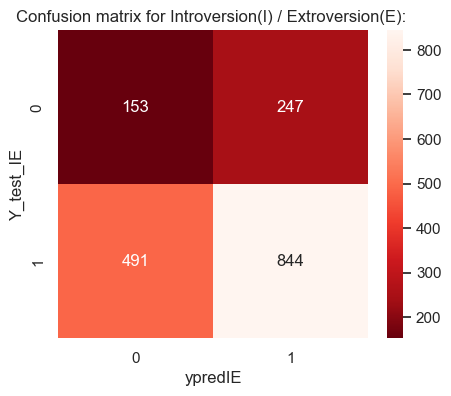

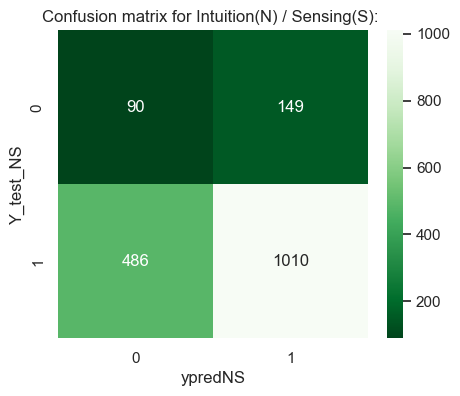

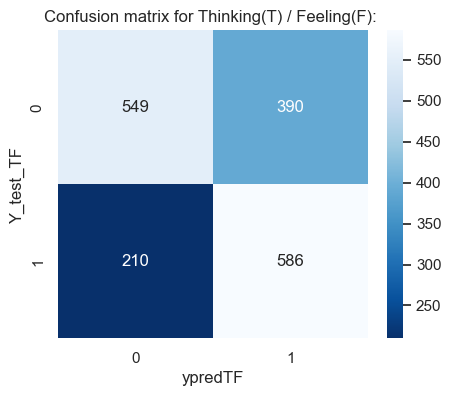

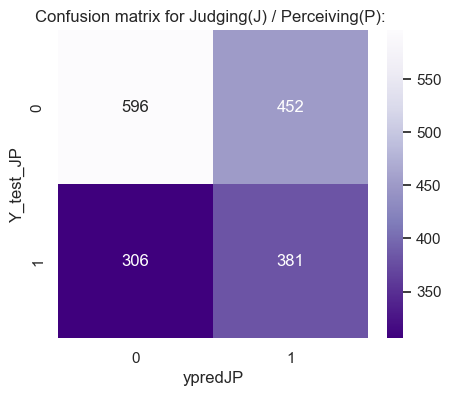

In [111]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

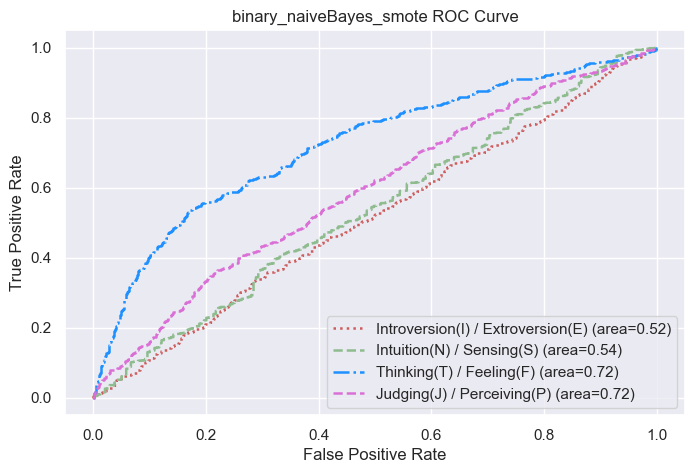

In [112]:
# ROC Curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF), grid4.best_estimator_.predict_proba(X_test_JP),
                    title='binary_naiveBayes_smote')

#### Logistic Regression

In [113]:
log = LogisticRegression(max_iter=500, random_state=42)
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
# Cross validation
grid1 = RandomizedSearchCV(log,param_grid,cv=5,random_state=42,scoring='f1')
grid2 = RandomizedSearchCV(log,param_grid,cv=5,random_state=42,scoring='f1')
grid3 = RandomizedSearchCV(log,param_grid,cv=5,random_state=42,scoring='f1')
grid4 = RandomizedSearchCV(log,param_grid,cv=5,random_state=42,scoring='f1')
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict_SMOTE(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.40      0.65      0.49       400
           1       0.87      0.71      0.78      1335

    accuracy                           0.69      1735
   macro avg       0.63      0.68      0.64      1735
weighted avg       0.76      0.69      0.71      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.28      0.72      0.40       239
           1       0.94      0.71      0.81      1496

    accuracy                           0.71      1735
   macro avg       0.61      0.71      0.60      1735
weighted avg       0.85      0.71      0.75      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       939
           1       0.76      0.82      0.79       796

    accuracy

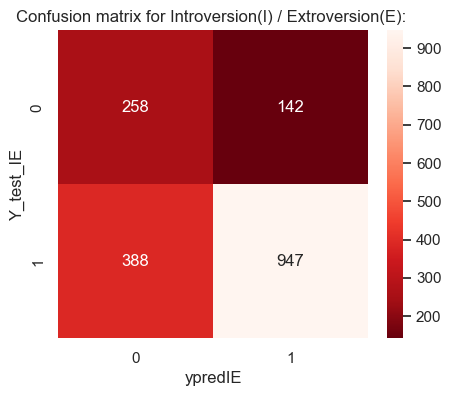

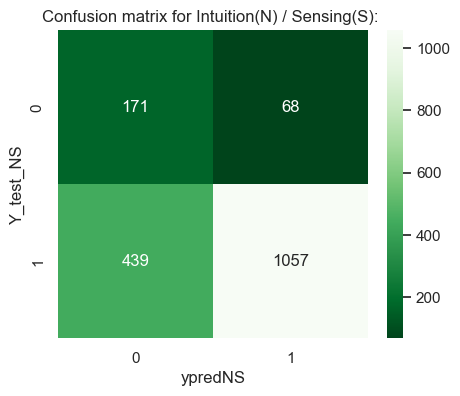

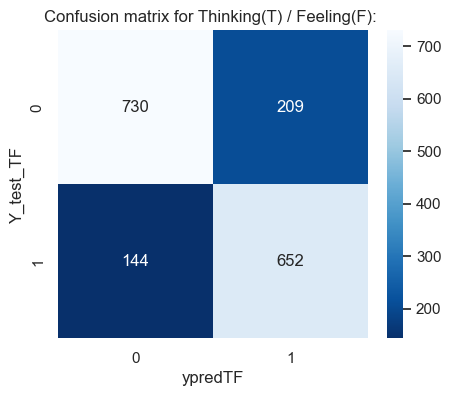

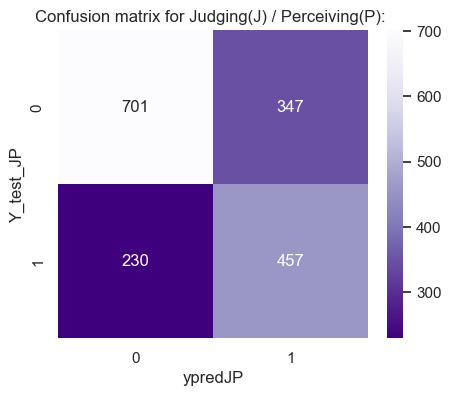

In [114]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

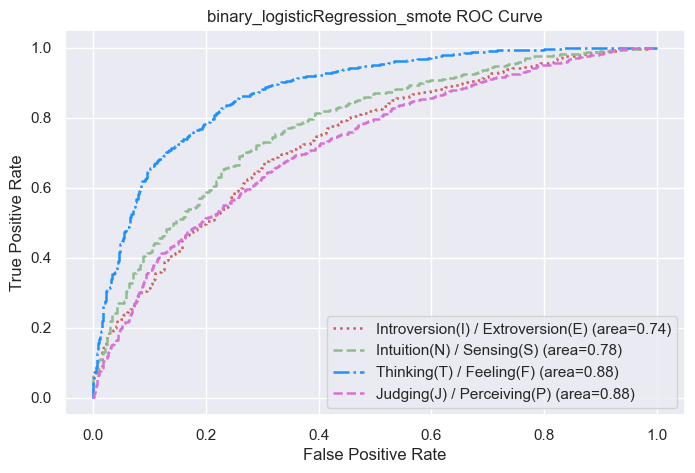

In [115]:
# ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP),
                    title='binary_logisticRegression_smote')

#### SVM

In [116]:
svm = SVC(random_state=42, probability=True, max_iter=100)
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001]}
# Cross validation
grid1 = RandomizedSearchCV(svm,param_grid,cv=5,random_state=42,scoring='f1')
grid2 = RandomizedSearchCV(svm,param_grid,cv=5,random_state=42,scoring='f1')
grid3 = RandomizedSearchCV(svm,param_grid,cv=5,random_state=42,scoring='f1')
grid4 = RandomizedSearchCV(svm,param_grid,cv=5,random_state=42,scoring='f1')
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict_SMOTE(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.45      0.03      0.05       400
           1       0.77      0.99      0.87      1335

    accuracy                           0.77      1735
   macro avg       0.61      0.51      0.46      1735
weighted avg       0.70      0.77      0.68      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.25      0.21      0.23       239
           1       0.88      0.90      0.89      1496

    accuracy                           0.80      1735
   macro avg       0.56      0.55      0.56      1735
weighted avg       0.79      0.80      0.80      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.81      0.43      0.56       939
           1       0.57      0.88      0.69       796

    accuracy

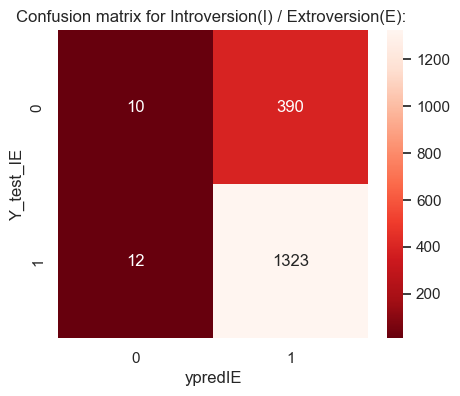

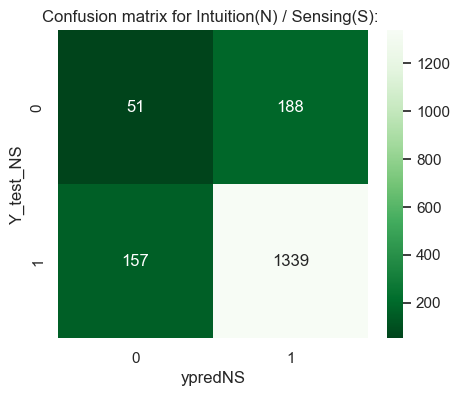

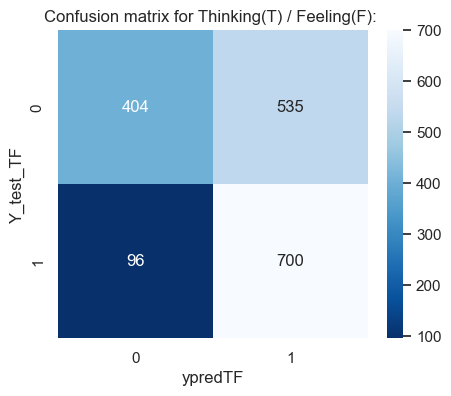

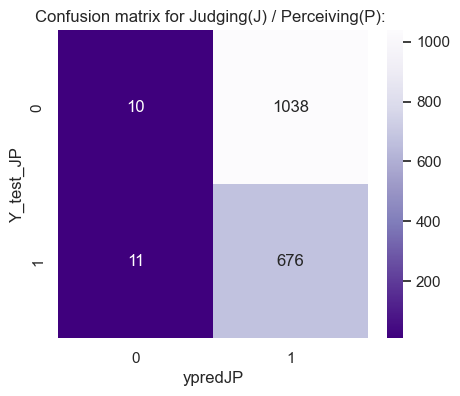

In [117]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

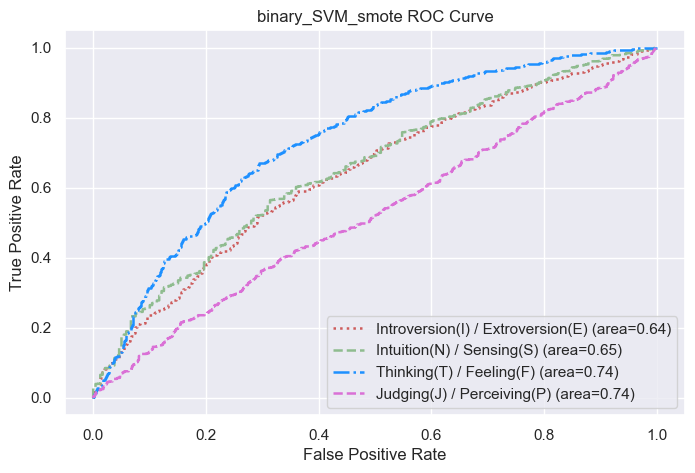

In [118]:
# ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP),
                    title='binary_SVM_smote')

#### K-Nearest Neighbor (KNN)

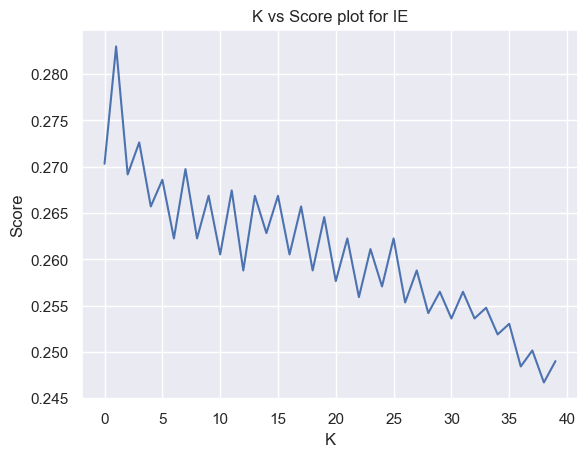

Maximum Accuracy of 0.2829971181556196 at k=2


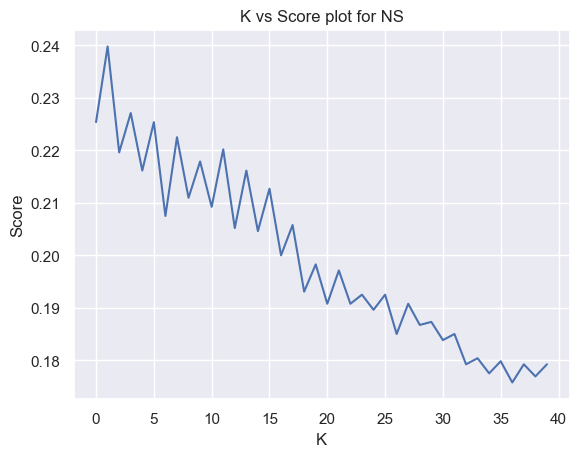

Maximum Accuracy of 0.2397694524495677 at k=2


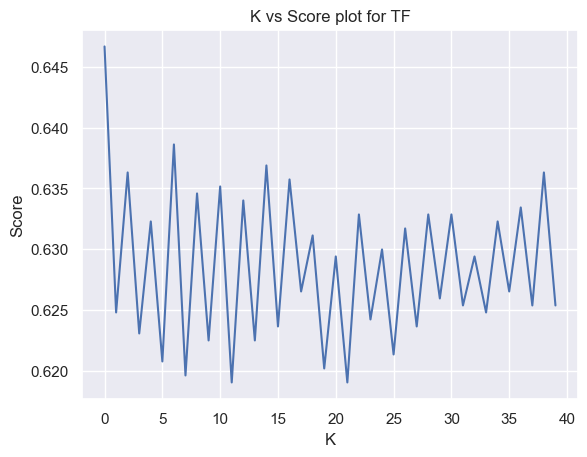

Maximum Accuracy of 0.646685878962536 at k=1


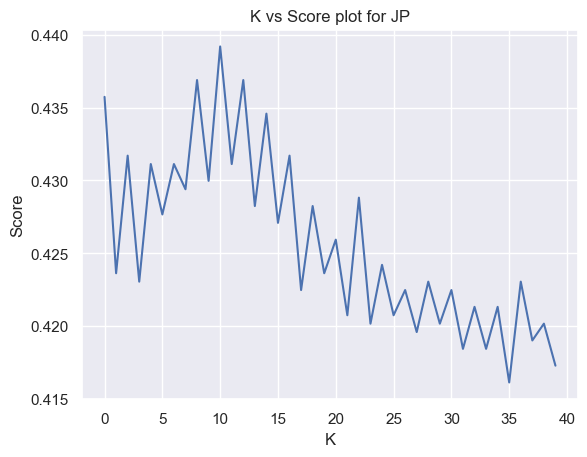

Maximum Accuracy of 0.646685878962536 at k=1


In [119]:
def plot_graph(val,xlab,ylab,title):
    plt.figure()
    plt.plot(val)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.title(title)
    plt.show()

# IE prediction
k1_score = []
for i in range(10,50):
    k1 = KNeighborsClassifier(n_neighbors=i)
    k1.fit(X_smote_IE, Y_smote_IE)
    k1_score.append(k1.score(X_test_IE, Y_test_IE))

df1 = pd.DataFrame(k1_score,columns=['IE'])
plot_graph(k1_score,'K','Score','K vs Score plot for IE')
print(f'Maximum Accuracy of {df1.max()[0]} at k={df1.idxmax()[0]+1}')

# NS prediction
k2_score = []
for i in range(10,50):
	k2 = KNeighborsClassifier(n_neighbors=i)
	k2.fit(X_smote_NS, Y_smote_NS)
	k2_score.append(k2.score(X_test_NS, Y_test_NS))

df2 = pd.DataFrame(k2_score,columns=['NS'])
plot_graph(k2_score,'K','Score','K vs Score plot for NS')
print(f'Maximum Accuracy of {df2.max()[0]} at k={df2.idxmax()[0]+1}')

# TF prediction
k3_score = []
for i in range(10,50):
  k3 = KNeighborsClassifier(n_neighbors=i)
  k3.fit(X_smote_TF, Y_smote_TF)
  k3_score.append(k3.score(X_test_TF, Y_test_TF))

df3 = pd.DataFrame(k3_score,columns=['TF'])
plot_graph(k3_score,'K','Score','K vs Score plot for TF')
print(f'Maximum Accuracy of {df3.max()[0]} at k={df3.idxmax()[0]+1}')

# JP prediction
k4_score=[]
for i in range(10,50):
  k4 = KNeighborsClassifier(n_neighbors=i)
  k4.fit(X_smote_JP, Y_smote_JP)
  k4_score.append(k4.score(X_test_JP, Y_test_JP))

df4 = pd.DataFrame(k3_score,columns=['JP'])
plot_graph(k4_score,'K','Score','K vs Score plot for JP')
print(f'Maximum Accuracy of {df4.max()[0]} at k={df4.idxmax()[0]+1}')

In [120]:
kbest = KNeighborsClassifier(n_neighbors=df1.idxmax()[0]+1)
ypredIE = kbest.fit(X_smote_IE,Y_smote_IE).predict(X_test_IE)
probIE = kbest.predict_proba(X_test_IE)

kbest = KNeighborsClassifier(n_neighbors=df2.idxmax()[0]+1)
ypredNS = kbest.fit(X_smote_NS,Y_smote_NS).predict(X_test_NS)
probNS = kbest.predict_proba(X_test_NS)

kbest = KNeighborsClassifier(n_neighbors=df3.idxmax()[0]+1)
ypredTF = kbest.fit(X_smote_TF,Y_smote_TF).predict(X_test_TF)
probTF = kbest.predict_proba(X_test_TF)

kbest = KNeighborsClassifier(n_neighbors=df4.idxmax()[0]+1)
ypredJP = kbest.fit(X_smote_JP,Y_smote_JP).predict(X_test_JP)
probJP = kbest.predict_proba(X_test_JP)

# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.24      0.94      0.38       400
           1       0.86      0.12      0.22      1335

    accuracy                           0.31      1735
   macro avg       0.55      0.53      0.30      1735
weighted avg       0.72      0.31      0.26      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.15      0.92      0.26       239
           1       0.93      0.17      0.28      1496

    accuracy                           0.27      1735
   macro avg       0.54      0.55      0.27      1735
weighted avg       0.83      0.27      0.28      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.72      0.48      0.57       939
           1       0.56      0.79      0.65       796

    accuracy

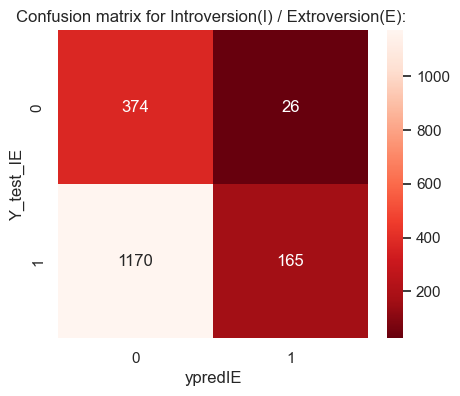

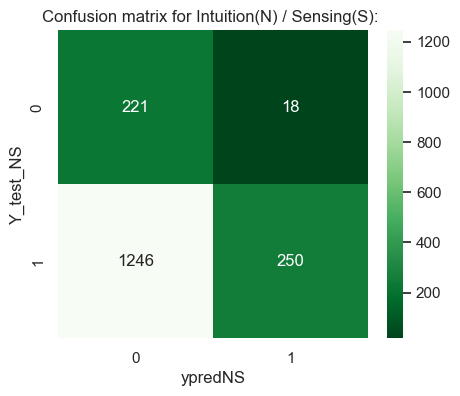

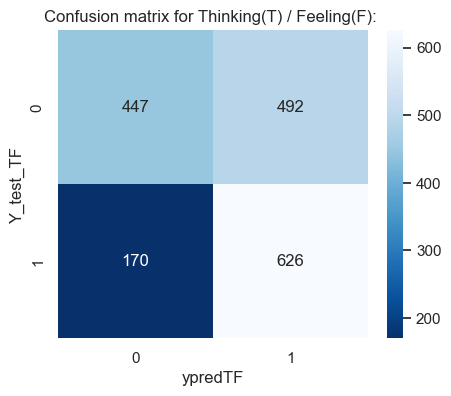

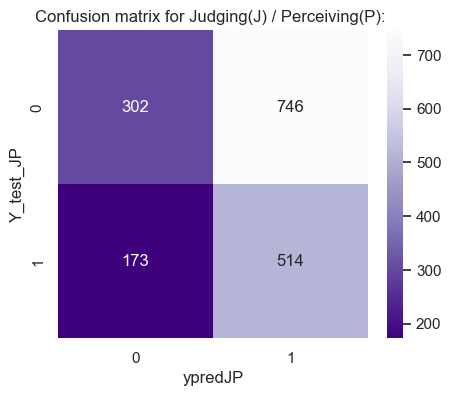

In [121]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

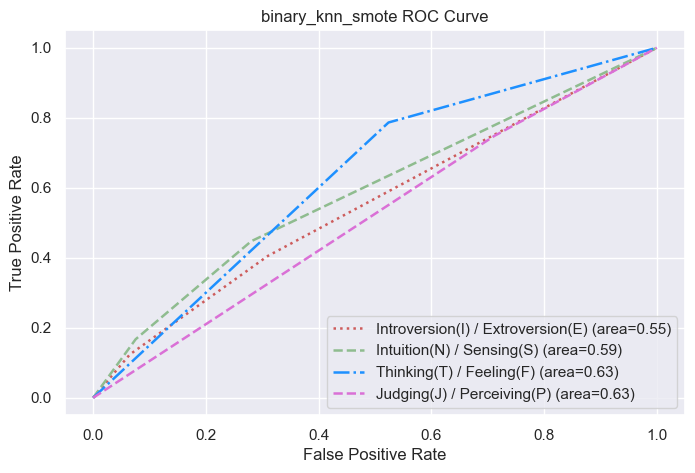

In [122]:
# ROC curve
print_roc_auc_curve(probIE, probNS, probTF, probJP, title='binary_knn_smote')

#### Decision Tree

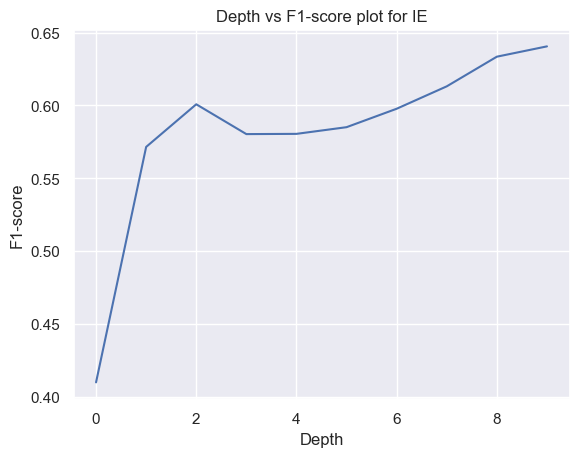

Maximum F1-score of 0.6406017667163114 at depth=10


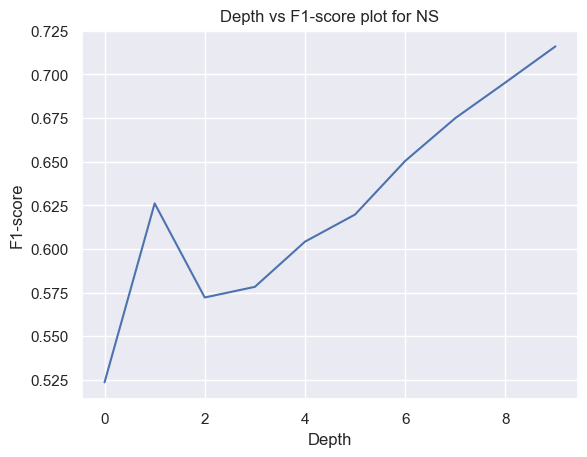

Maximum F1-score of 0.7160845086118925 at depth=10


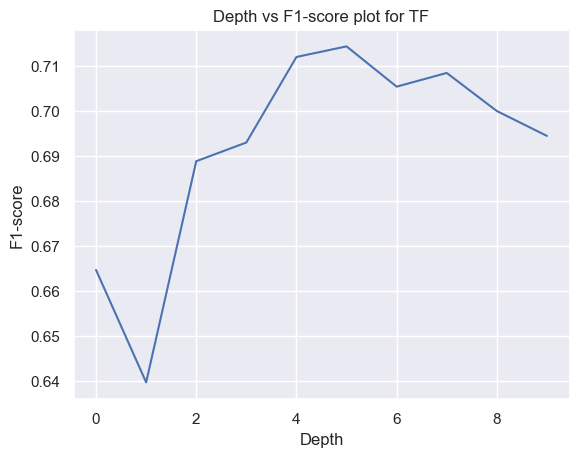

Maximum F1-score of 0.7143126038118236 at depth=6


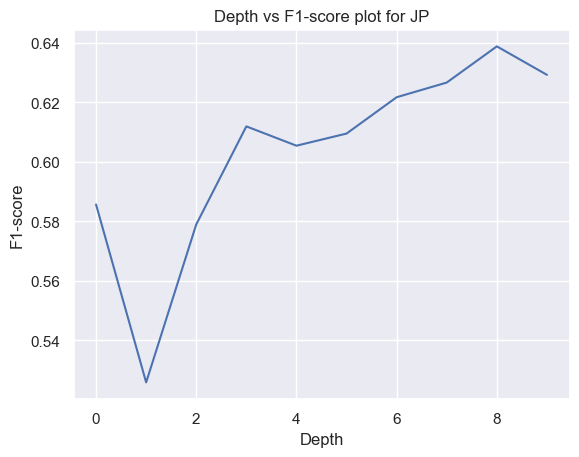

Maximum F1-score of 0.6388206456482545 at depth=9


In [123]:
def plot_graph(val, title):
    plt.plot(val)
    plt.ylabel('F1-score')
    plt.xlabel('Depth')
    plt.title(title)
    plt.show()

# IE prediction
k1_score = []
for i in range(1,11):
    k1_cart = DecisionTreeClassifier(criterion="gini", max_depth=i)
    score = cross_val_score(k1_cart, X_smote_IE, Y_smote_IE, cv=5, scoring='f1')
    k1_score.append(score.mean())
df1 = pd.DataFrame(k1_score,columns=['IE'])
plot_graph(k1_score,'Depth vs F1-score plot for IE')
print(f'Maximum F1-score of {df1.max()[0]} at depth={df1.idxmax()[0]+1}')

# NS prediction
k2_score = []
for i in range(1,11):
    k2_cart = DecisionTreeClassifier(criterion="gini", max_depth=i)
    score = cross_val_score(k2_cart, X_smote_NS, Y_smote_NS, cv=5, scoring='f1')
    k2_score.append(score.mean())
df2 = pd.DataFrame(k2_score,columns=['NS'])
plot_graph(k2_score,'Depth vs F1-score plot for NS')
print(f'Maximum F1-score of {df2.max()[0]} at depth={df2.idxmax()[0]+1}')

# TF prediction
k3_score = []
for i in range(1,11):
    k3_cart = DecisionTreeClassifier(criterion="gini", max_depth=i)
    score = cross_val_score(k3_cart, X_smote_TF, Y_smote_TF, cv=5, scoring='f1')
    k3_score.append(score.mean())
df3 = pd.DataFrame(k3_score,columns=['TF'])
plot_graph(k3_score,'Depth vs F1-score plot for TF')
print(f'Maximum F1-score of {df3.max()[0]} at depth={df3.idxmax()[0]+1}')

# JP prediction
k4_score=[]
for i in range(1,11):
    k4_cart = DecisionTreeClassifier(criterion="gini", max_depth=i)
    score = cross_val_score(k4_cart, X_smote_JP, Y_smote_JP, cv=5, scoring='f1')
    k4_score.append(score.mean())
df4 = pd.DataFrame(k4_score,columns=['JP'])
plot_graph(k4_score,'Depth vs F1-score plot for JP')
print(f'Maximum F1-score of {df4.max()[0]} at depth={df4.idxmax()[0]+1}')

In [124]:
dtbest = DecisionTreeClassifier(random_state=42,criterion="gini",max_depth=df1.idxmax()[0]+1)
ypredIE = dtbest.fit(X_smote_IE,Y_smote_IE).predict(X_test_IE)
probIE = dtbest.predict_proba(X_test_IE)

dtbest = DecisionTreeClassifier(random_state=42,criterion="gini",max_depth=df2.idxmax()[0]+1)
ypredNS = dtbest.fit(X_smote_NS,Y_smote_NS).predict(X_test_NS)
probNS = dtbest.predict_proba(X_test_NS)

dtbest = DecisionTreeClassifier(random_state=42,criterion="gini",max_depth=df3.idxmax()[0]+1)
ypredTF = dtbest.fit(X_smote_TF,Y_smote_TF).predict(X_test_TF)
probTF = dtbest.predict_proba(X_test_TF)

dtbest = DecisionTreeClassifier(random_state=42,criterion="gini",max_depth=df4.idxmax()[0]+1)
ypredJP = dtbest.fit(X_smote_JP,Y_smote_JP).predict(X_test_JP)
probJP = dtbest.predict_proba(X_test_JP)

# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.29      0.58      0.39       400
           1       0.82      0.58      0.68      1335

    accuracy                           0.58      1735
   macro avg       0.56      0.58      0.54      1735
weighted avg       0.70      0.58      0.61      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.18      0.55      0.28       239
           1       0.89      0.61      0.73      1496

    accuracy                           0.60      1735
   macro avg       0.54      0.58      0.50      1735
weighted avg       0.80      0.60      0.67      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       939
           1       0.63      0.73      0.68       796

    accuracy

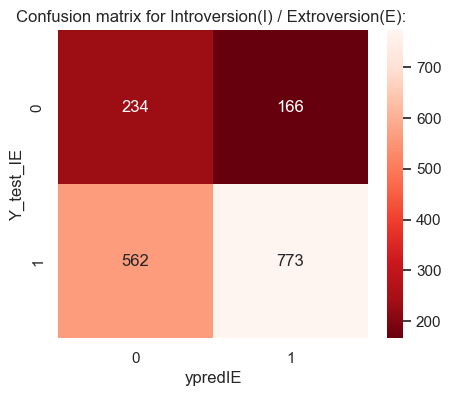

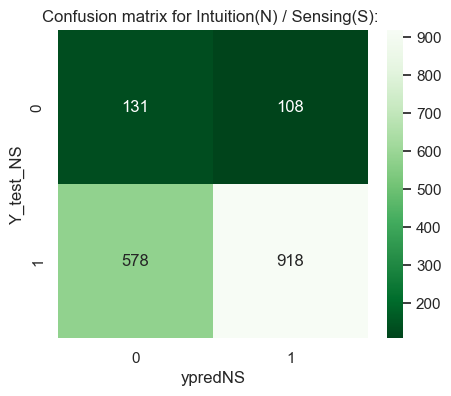

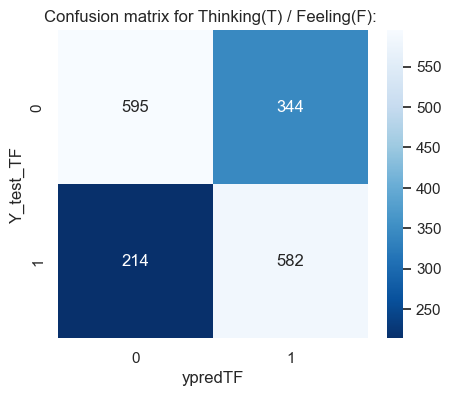

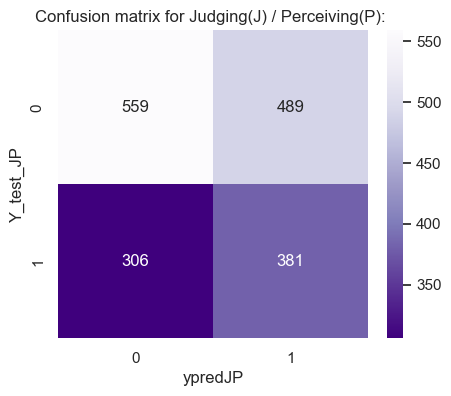

In [125]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

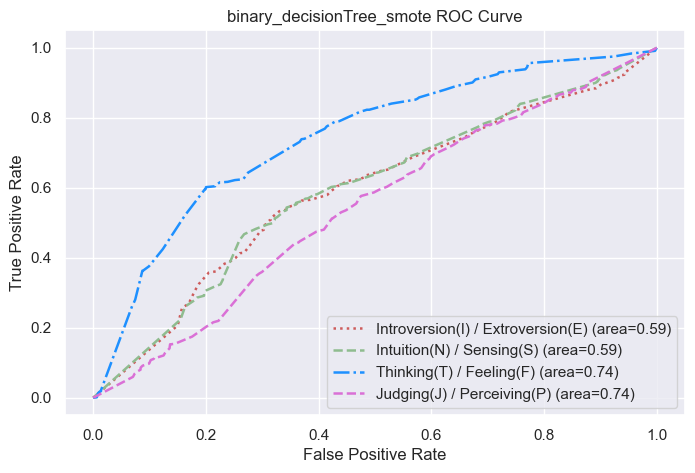

In [126]:
# ROC curve
print_roc_auc_curve(probIE, probNS, probTF, probJP, title='binary_decisionTree_smote')

#### Random Forest

In [127]:
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100,200,300]}
# Cross validation
grid1 = RandomizedSearchCV(rf,param_grid,cv=5,random_state=42,scoring='f1',verbose=1)
grid2 = RandomizedSearchCV(rf,param_grid,cv=5,random_state=42,scoring='f1',verbose=1)
grid3 = RandomizedSearchCV(rf,param_grid,cv=5,random_state=42,scoring='f1',verbose=1)
grid4 = RandomizedSearchCV(rf,param_grid,cv=5,random_state=42,scoring='f1',verbose=1)
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict_SMOTE(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.38      0.16      0.22       400
           1       0.79      0.92      0.85      1335

    accuracy                           0.75      1735
   macro avg       0.58      0.54      0.54      1735
weighted avg       0.69      0.75      0.70      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.34      0.10      0.16       239
           1       0.87      0.97      0.92      1496

    accuracy                           0.85      1735
   macro avg       0.61      0.54      0.54      1735
weighted avg       0.80      0.85      0.81 

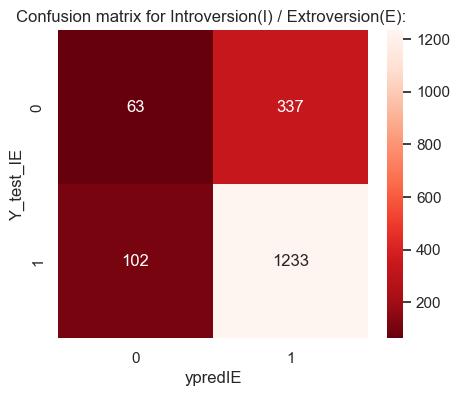

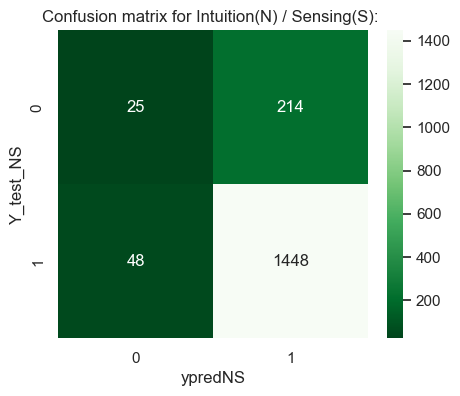

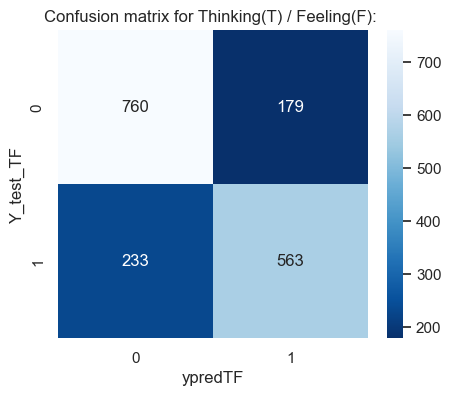

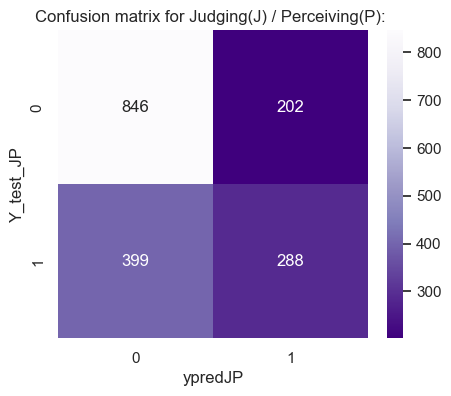

In [128]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

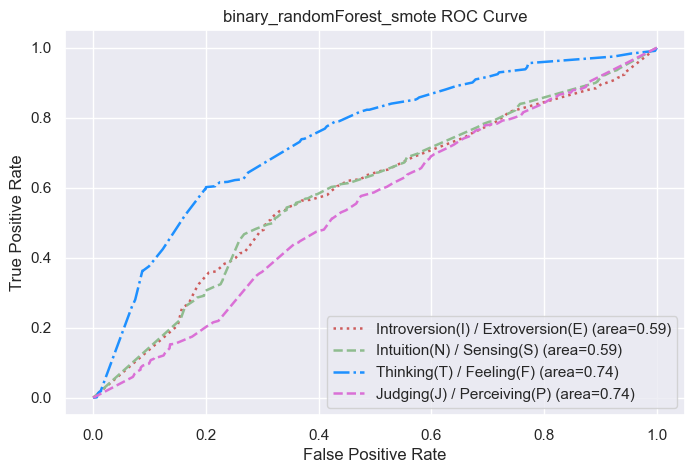

In [129]:
# ROC curve
print_roc_auc_curve(probIE, probNS, probTF, probJP, title='binary_randomForest_smote')

#### GradientBoost

In [130]:
boost = GradientBoostingClassifier(random_state=42,n_iter_no_change=3)
param_grid = {'learning_rate': [0.01, 0.1, 0.5]}
# Cross validation
grid1 = RandomizedSearchCV(boost,param_grid,cv=5,random_state=42,scoring='f1')
grid2 = RandomizedSearchCV(boost,param_grid,cv=5,random_state=42,scoring='f1')
grid3 = RandomizedSearchCV(boost,param_grid,cv=5,random_state=42,scoring='f1')
grid4 = RandomizedSearchCV(boost,param_grid,cv=5,random_state=42,scoring='f1')
# Prediction
ypredIE, ypredNS, ypredTF, ypredJP = predict_SMOTE(grid1, grid2, grid3, grid4)
# Print classification report
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E):
               precision    recall  f1-score   support

           0       0.36      0.48      0.41       400
           1       0.83      0.75      0.78      1335

    accuracy                           0.68      1735
   macro avg       0.59      0.61      0.60      1735
weighted avg       0.72      0.68      0.70      1735


Classification Report for Intuition(N) / Sensing(S):
               precision    recall  f1-score   support

           0       0.25      0.36      0.30       239
           1       0.89      0.83      0.86      1496

    accuracy                           0.76      1735
   macro avg       0.57      0.60      0.58      1735
weighted avg       0.80      0.76      0.78      1735


Classification Report for Thinking(T) / Feeling(F):
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       939
           1       0.74      0.78      0.76       796

    accuracy

In [133]:
pd.DataFrame(grid1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.310458,0.362269,0.004869,0.000327,0.01,{'learning_rate': 0.01},0.645131,0.661323,0.664969,0.632119,0.649485,0.650605,0.011783,3
1,18.888201,0.370701,0.004896,0.000909,0.1,{'learning_rate': 0.1},0.707784,0.744230,0.793363,0.776074,0.794688,0.763228,0.033160,1
2,7.191436,2.346468,0.002376,0.000384,0.5,{'learning_rate': 0.5},0.706868,0.724638,0.795547,0.771341,0.796773,0.759033,0.036914,2


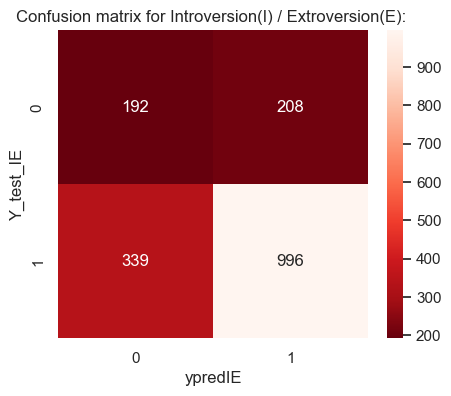

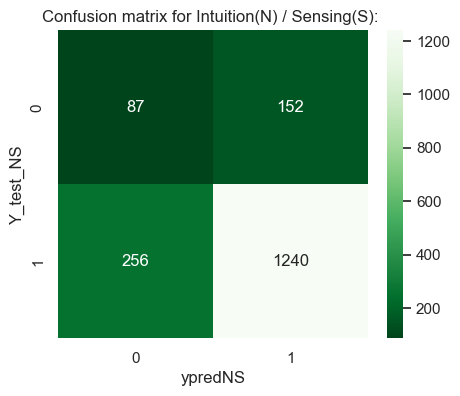

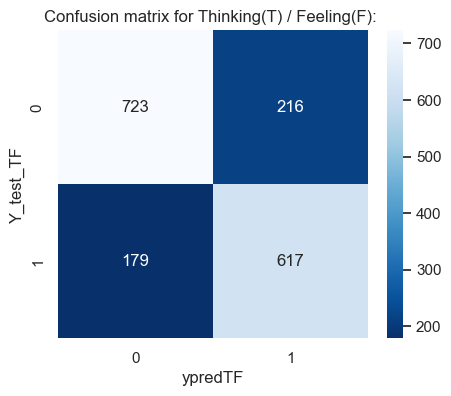

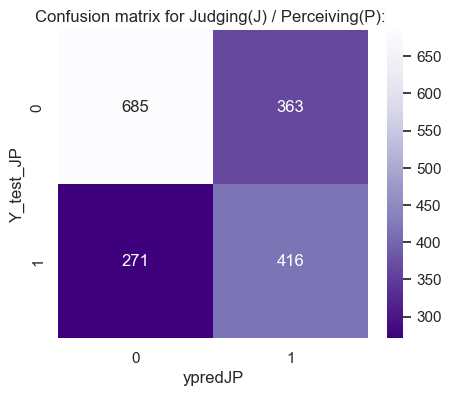

In [131]:
# Confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

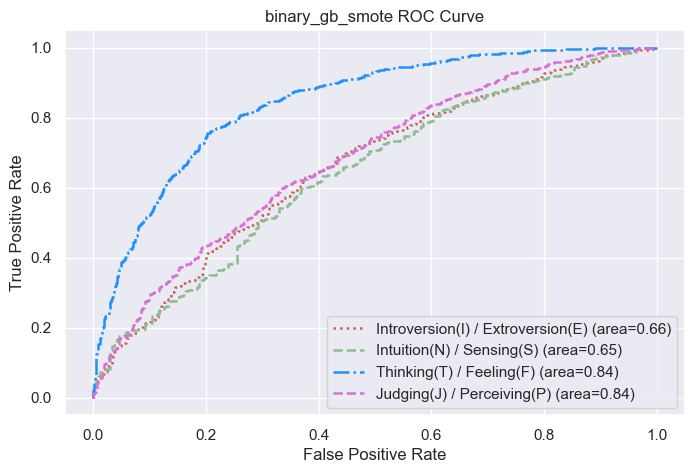

In [132]:
# ROC Curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF), grid4.best_estimator_.predict_proba(X_test_JP),
                    title='binary_gb_smote')